In [18]:
import pandas as pd
import tensorflow as tf
import numpy as np



In [19]:
# pip install gensim

In [20]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PREPARE DATA

In [78]:
corpus_text = [# --- TOPIC 1: FOOD & FRUITS ---
    "I eat mango and apple everyday",
    "Mango is a very sweet and delicious fruit",
    "Apple pie is a tasty dessert",
    "Banana is yellow and good for health",
    "Fruits like mango apple and banana are healthy",
    "I love eating pizza and burger for dinner",
    "Burger is a fast food",
    "Pizza contains cheese and tomato sauce",
    "I am hungry I want to eat food",
    "Restaurant serves delicious meals",
    "Vegetables and fruits are essential for diet",
    "Cook dinner in the kitchen",
    "Sweet desserts like cake and chocolate",
    
    # --- TOPIC 2: SPORTS & GAMES ---
    "Cricket is a popular sport in India",
    "Virat Kohli plays cricket for the team",
    "Football is played with a ball in a stadium",
    "Messi is a famous football player",
    "Players run fast to score a goal",
    "Tennis is played with a racket and ball",
    "The match was played in a big stadium",
    "The team won the championship trophy",
    "Athletes run in the olympics",
    "Bat and ball are used in cricket matches",
    "Score runs to win the cricket game",
    "The referee blew the whistle",

    # --- TOPIC 3: TECHNOLOGY & CODING ---
    "Python is a popular programming language",
    "Computers use binary code to process data",
    "Artificial Intelligence and machine learning are the future",
    "Data science involves statistics and algorithms",
    "Software developers write code in java and python",
    "The computer requires a keyboard and mouse",
    "Internet connects computers globally",
    "Deep learning models use neural networks",
    "Robots are built using engineering and ai",
    "The server stores massive amounts of data",
    "Programmers debug the software code",
    "Technology is advancing rapidly",
    "chirag and agrim are humans"
]


## PREPROCESSING THE TEXT

In [79]:
tokenized_text = []
for sent in corpus_text:
    tokens = gensim.utils.simple_preprocess(sent)
    tokenized_text.append(tokens)


In [80]:
tokenized_text

[['eat', 'mango', 'and', 'apple', 'everyday'],
 ['mango', 'is', 'very', 'sweet', 'and', 'delicious', 'fruit'],
 ['apple', 'pie', 'is', 'tasty', 'dessert'],
 ['banana', 'is', 'yellow', 'and', 'good', 'for', 'health'],
 ['fruits', 'like', 'mango', 'apple', 'and', 'banana', 'are', 'healthy'],
 ['love', 'eating', 'pizza', 'and', 'burger', 'for', 'dinner'],
 ['burger', 'is', 'fast', 'food'],
 ['pizza', 'contains', 'cheese', 'and', 'tomato', 'sauce'],
 ['am', 'hungry', 'want', 'to', 'eat', 'food'],
 ['restaurant', 'serves', 'delicious', 'meals'],
 ['vegetables', 'and', 'fruits', 'are', 'essential', 'for', 'diet'],
 ['cook', 'dinner', 'in', 'the', 'kitchen'],
 ['sweet', 'desserts', 'like', 'cake', 'and', 'chocolate'],
 ['cricket', 'is', 'popular', 'sport', 'in', 'india'],
 ['virat', 'kohli', 'plays', 'cricket', 'for', 'the', 'team'],
 ['football', 'is', 'played', 'with', 'ball', 'in', 'stadium'],
 ['messi', 'is', 'famous', 'football', 'player'],
 ['players', 'run', 'fast', 'to', 'score', 'goa

In [81]:
model = Word2Vec(
    sentences=tokenized_text,
    vector_size= 5,
    window=5, # 5 words after and 5 words before are checked
    sg=1, # 1 stand for skip-gram 0 for CBOW
    min_count=1
)

## Use the model

In [82]:
model.wv['sweet'], model.wv['dessert']

(array([-0.13416444, -0.14102955, -0.04964317,  0.10167354, -0.07347234],
       dtype=float32),
 array([-0.0362036 ,  0.13022405, -0.05460286,  0.09845833,  0.13798498],
       dtype=float32))

In [83]:
model.wv.most_similar('chirag')

[('software', 0.9610364437103271),
 ('write', 0.9163171648979187),
 ('keyboard', 0.8790135383605957),
 ('runs', 0.8598983287811279),
 ('computers', 0.8133134245872498),
 ('meals', 0.7290870547294617),
 ('built', 0.728988528251648),
 ('mouse', 0.7287966012954712),
 ('server', 0.7275175452232361),
 ('everyday', 0.703458309173584)]

In [84]:
np.dot(model.wv['sweet'], model.wv['dessert'])

np.float32(-0.010925016)

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([model.wv['fruit']], [model.wv['banana']])

array([[0.10568415]], dtype=float32)

In [86]:
list1 = ['mango','banana','football']
model.wv.doesnt_match(list1)

'banana'

### VISUALIZATION

In [87]:
words_of_interest = [
    'apple', 'banana', 'fruit', 'burger', 'pizza',
    'cricket', 'football', 'tennis', 'player', 'ball',
    'python', 'java', 'computer', 'code', 'software', 'chirag', 'agrim'
]

vectors = [model.wv[w] for w in words_of_interest]
len(vectors)

17

In [88]:
vectors = np.array(vectors)
vectors.shape

(17, 5)

In [90]:
## reduce the dimension of these vectors of 2
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)
vectors_2d.shape

(17, 2)

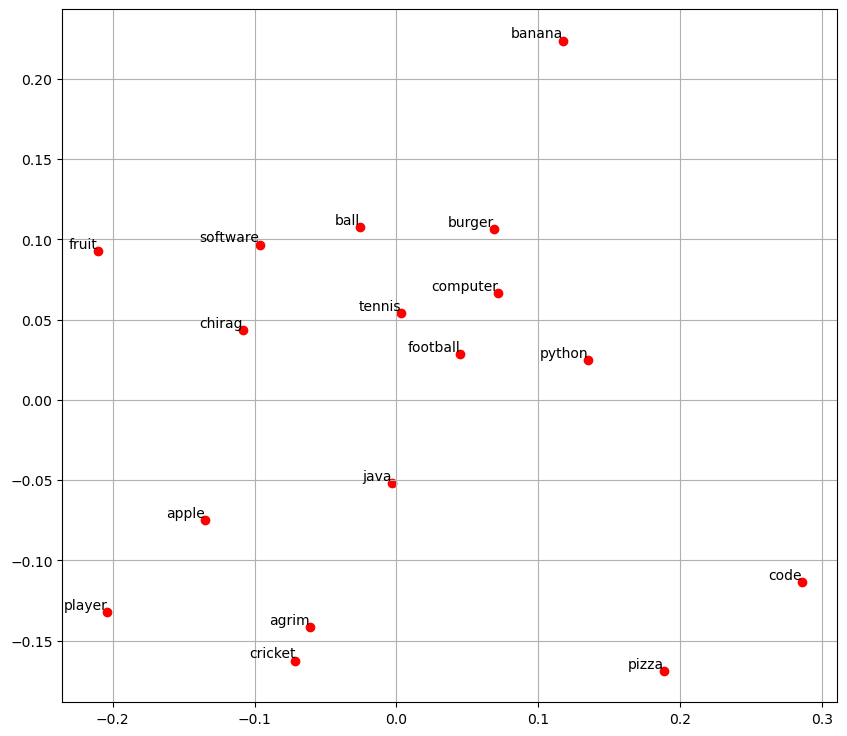

In [101]:
plt.figure(figsize=(10,9))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1], color='r')
for i, word in enumerate(words_of_interest):
    plt.annotate(word, xy=(vectors_2d[i,0], vectors_2d[i,1]),
                ha='right', va='bottom'
                 )
plt.grid()

In [102]:
# glove.6b.50d.txt download download this aj